# Les Optimisations de mix de produits ( produits mix )

## Introduction.


Les optimisations de type mix de produits sont les premières abordées en optimisation.

Elles permettent d'optimiser la production et le rendement commercial d'une usine ou d'une organisation agricole, et d'éviter en premier ressort des logiques de production aberrantes.

Elles permettent à une usine de savoir quels produits il vaut mieux produire dans son éventail de produits, afin de maximiser son profit.


Un exemple d'optimisation mixe de produits pour une entreprise de chalets
dans mon application www.solvgraph.com :
<div style="text-align:center">
<img src="img/product-mix1.png">
</div>

Dans ses versions non linéaires, elles permettent plus de sophistication et permettent de coller à la réalité.

Dans cette étude, je vais utiliser plusieurs solveurs, et faire des optimisations linéaires et non 
linéaires.

Etude globale proposée par <b>Estelle Derrien - Github15000</b>

CREATION EN COURS


# Sommaire 

- 1. Maximisation de profit <b>linéaire.</b>
        - Notre problème de base
        - Modélisation mathématique
        - Solution avec Python Pulp
- 3. A quoi sert l'analyse de sensitivité ?
- 4. Ajout des coûts fixes et variables.
- 5. Forcer la production d'un élément.
- 6. Ajout de contraintes binaires/conditionnelles.
    - Coûts conditionnels
        - avec Pulp
        - avec Cplex
    - Associations conditionnelles
        - avec Pulp
        - avec Cplex
- 7. Ajout de "Multiples de".
- 8. Réductions du frais de transport en %
        - description
        - avec Pulp
- 8. Ajout de contraintes de coûts additionels.
    - Description
    - Solution avec Python Pulp
- 9. Ajout de contraintes de coûts discontinues.
    - Description
    - Solution avec Python Pulp
- 10. Ajout de contraintes Piecewize.
    - Description
    - Solution avec Cplex
    - Solution avec Python Pulp
    - Création de fonctions piecewize à partir d'une fonction courbe
- 11. Réaliser une simulation linéaire de profit avec la loi normale
     - Description
     - Solution avec Python Pulp
- 12. Syntaxe avancée de boucles et listes.
     - Exemple : Production agrégée
     - Solution avec Python Pulp
- 13. Prise en compte des Invendus.
     - Description
     - Solution avec Python Pulp

***************************************************************************   
- 13. Maximisation de profit <b>non linéaire</b>
    - Notre problème de base
    - Modélisation mathématique
    - Exemple
    - Exemple avec boucles For
    - Solution avec Python Gekko
        - Sans Boucle For
        - Avec Boucle For
    - Solution avec Cplex
    - Ajout de contraintes binaires
    - Ajout de contraintes piecewize




# Maximisation de profit linéaire 

# Notre problème de base.

- J'ai le choix entre 3 types de vaches pour produire du lait: Charolaises, Blanc Bleuc et salers.

- J'ai 600 kgs de nourriture, 700 litres d'eau en stock .

- Chaque animal consomme respectivement 7kgs,7kgs,8kgs de nourriture par jour.

- Chaque animal consomme respectivement 4.5l,9l et 3l d'eau par jour.

- Chaque animal rapporte respectivement 100,110,et 115 euros.

Quels animaux faut-il élever afin de maximiser mon profit ?



# Modélisation Mathématique.

- Soit V un ensemble de animaux indicées par i (v1,v2,v3...vi)
- Soit Nij la nourriture consommée par chaque animal, c'est une matrice ( ou un tableau).
- Soit Eij l'eau consommée par chaque animal, c'est une matrice ( ou un tableau).
- Soit Pij le profit rapporté par chaque animal , c'est une matrice ( ou un tableau).
- Soit N la quantité de nourriture en stock
- Soit E la quantité d'eau en stock


Je veux maximiser mon profit  sous les contraintes de nourriture et d'eau.

Max  Σ Vi*Pij

s.t

Σ Nij*Vi <= N , ∀ n  ∈  {n1,n2,n3}

Σ Eij*Vi <= E , ∀ e  ∈  {e1,e2,e3}



# Solution avec Python Pulp

Comme on a que 3 animaux, on peut résoudre sans utiliser les boucles FOR, qui paraissent un peu compliquées quand on débute.

In [46]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème, 
# On dit que ce sont des variables entières, car on ne peut pas avoir une demi vache.
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)  

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  100 * charolaise + 110 * blanc_bleu + 115 * salers

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 72.0
charolaise = 0.0
salers = 12.0
Profit total maximisé =  9300.0


# A quoi sert l'analyse de sensitivité ?

Le meilleur lien pour comprendre :
https://www.eit.lth.se/fileadmin/eit/courses/eitn95/2018/Labs_assignments/Sensitivity_Analysis_in_Excel.pdf

L'analyse de sensitivité permet de savoir dans quelle mesure on peut changer les paramêtres de la solution apportée.

- Les Coûts réduits:

Les coûts réduits nous indiquent de combien les coefficients de la fonction objectif (bénéfices unitaires) peuvent être augmentés ou diminués avant que la solution optimale ne change. Exemple : "Si nous augmentons le profit unitaire des sièges pour enfants avec 20 unités ou plus, la valeur optimale va changer"

- Le shadow price:

Le shadow price ou "prix fictif" en français nous indique de combien la solution optimale peut être augmentée ou diminuée si nous modifions les ressources disponibles d'une seule unité.
 ou 
Le prix fictif mesure la variation de la valeur de la fonction objectif par unité d'augmentation de la limite de la contrainte.

- Les slacks:

La quantité d'une ressource qui n'est pas utilisée. Permettent de savoir combien de ressources sont "gaspillées" ou "non utilisées". Lorsque l'on a des contraintes de stock, ces valeurs permettent de savoir la quantité de stock inutilisée.


# Afficher l'analyse de sensitivité avec Python Pulp



In [47]:
# Le bon lien : https://s3.amazonaws.com/assets.datacamp.com/production/course_8835/slides/chapter4.pdf

# Importer la librairie Pulp sous le pseudo p
import pulp as p 
import pandas as pd

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème, 
# On dit que ce sont des variables entières, car on ne peut pas avoir une demi vache.
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)  

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
# Les coûts réduits sont ici.
Mon_Probleme +=  100 * charolaise + 110 * blanc_bleu + 115 * salers

# Les contraintes : 
# Les shadow price sont ici :
# nourriture
Mon_Probleme += (7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600,"Contrainte_eau")

# eau
Mon_Probleme += (4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700,"Contrainte_nourriture")

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))
print(f"status: {Mon_Probleme.status}, {p.LpStatus[Mon_Probleme.status]}")

# Analyse de sensitivité
sensitivity_data = []
for name, constraint in Mon_Probleme.constraints.items():
    sensitivity_data.append({'Name': name,
                             'Constraint': constraint,
                             'Shadow Price': constraint.pi,
                             'Slack': constraint.slack
                             })
Modeloutput = pd.DataFrame(sensitivity_data)
print((Modeloutput))


blanc_bleu = 72.0
charolaise = 0.0
salers = 12.0
Profit total maximisé =  9300.0
status: 1, Optimal
                    Name                                   Constraint  \
0         Contrainte_eau    {charolaise: 7, blanc_bleu: 7, salers: 8}   
1  Contrainte_nourriture  {charolaise: 4.5, blanc_bleu: 9, salers: 3}   

   Shadow Price  Slack  
0          -0.0   -0.0  
1          -0.0   16.0  


# Un deuxième court exemple montrant le Shadow Price en action.

Le Shadow Price nous indique que si on incrémente de 1 la contrainte 1, on va gagner 78.14 euros en plus !
En faisant le test, cela fontionne !

Auteur : Aaren Stubberfield

In [48]:

import pulp as p
model = p.LpProblem("Max_GlassCo_Profits",p.LpMaximize)
A = p.LpVariable('A', lowBound=0)
B = p.LpVariable('B', lowBound=0)
C = p.LpVariable('C', lowBound=0)
model += 500 * A + 450 * B + 600 * C
# Constraint 1
model += 6 * A + 5 * B + 8 * C <= 60
# Constraint 2
model += 10.5 * A + 20 * B + 10 * C <= 150
# Constraint 3
model += A <= 8
# Solve Model
model.solve()
print("Model Status:{}".format(p.LpStatus[model.status]))
print("Objective = ", p.value(model.objective))
for v in model.variables():
    print(v.name, "=", v.varValue)
# Analyse de sensitivité
sensitivity_data = []
for name, constraint in model.constraints.items():
    sensitivity_data.append({'Name': name,
                             'Constraint': constraint,
                             'Shadow Price': constraint.pi,
                             'Slack': constraint.slack
                             })
Modeloutput = pd.DataFrame(sensitivity_data)
print((Modeloutput))

Model Status:Optimal
Objective =  5133.333350000001
A = 6.6666667
B = 4.0
C = 0.0
  Name               Constraint  Shadow Price     Slack
0  _C1       {A: 6, B: 5, C: 8}     78.148148 -0.000000
1  _C2  {A: 10.5, B: 20, C: 10}      2.962963 -0.000000
2  _C3                   {A: 1}     -0.000000  1.333333


# Ajout des coûts fixes et variables.

Mon exploitation a un coût fixe de 1200 euros.
Chaque animal implique un coût variable de respectivement 10,12 et 9.5 euros.

Je veux inclure ces éléments à la fonction objectif afin qu'elle les prenne en compte lors de l'optimisation.

Note:  On est toujours dans le cadre d'un problème linéaire, les coûts variables des animaux est donc proportionnel au nombre d'animaux, chaque animal a un coût fixe directement appliqué, il ne diminue pas ou ne varie pas avec le nombre, si c'était le cas, on serait dans un problème non linéaire.

In [49]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème 
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)   

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  ((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * blanc_bleu + 
             (115 - cout_salers) * salers ) - cout_fixe

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 72.0
charolaise = 0.0
salers = 12.0
Profit total maximisé =  7322.0


# Forcer la production d'un élément.

On voit dans notre résultat que le solveur nous dit de ne pas produire de charolaises, afin de maximiser notre profit.
Mais je veux tout de même avoir 20 Charolaises au minimum dans mon cheptel et 20 salers au minimum, même si cela implique une perte de profit.


In [50]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème 
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)   

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  ((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * blanc_bleu + 
             (115 - cout_salers) * salers ) - cout_fixe

# Les contraintes : 
# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600
# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Minimum de 20 charolaises
Mon_Probleme += charolaise >= 20

# Minimum de 20 salers
Mon_Probleme += salers >= 20

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 36.0
charolaise = 20.0
salers = 26.0
Profit total maximisé =  7071.0


# Ajout de contrainte conditionnelle. (1)

Je veux que si mon cheptel d'animaux de type blanc_bleu dépasse les 30 unités, un coût additionnel de main d'oeuvre de 30 euros soies appliqué.

In [51]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème 
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger) 

# Variable binaire On/Off
depassement_blanc_bleu =   p.LpVariable("depassement_blanc_bleu", 0, None, p.LpBinary)

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  ((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * 
             blanc_bleu + (115 - cout_salers) * salers ) - cout_fixe -  30 * depassement_blanc_bleu

# Les contraintes : 
# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600
# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700
# Minimum de 20 charolaises
Mon_Probleme += charolaise >= 20
# Minimum de 20 salers
Mon_Probleme += salers >= 20

# La variable binaire
# Si mon cheptel de blanc_bleu dépasse 30, alors la variable binaire est à 1 et le
# coût de 30 est soustrait de la fonction objectif, attention, c'est pris en compte
# en cours d'optimisation.
M = 1000  # M se calcule selon une certaine méthode ( BigM)
# si blanc_bleu > 30 alors z = 1 s'écrit comme cela avec PULP
Mon_Probleme += depassement_blanc_bleu  >= (blanc_bleu - 30 )/M

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 36.0
charolaise = 20.0
depassement_blanc_bleu = 1.0
salers = 26.0
Profit total maximisé =  7041.0


# Ajout de contrainte conditionnelle. (2)

Je veux que si mon cheptel d'animaux de type blanc_bleu dépasse les 30 unités, un coût additionnel de main d'oeuvre de 30 euros soies appliqué.
Cette fois ci, on résouds avec le solveur <b>Python Cplex</b>, qui permet d'exprimer les contraintes conditionnelles très naturellement ( Mais il est payant..).

In [52]:
import cplex
import docplex.mp
from docplex.mp.model import Model

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# On crée notre modèle
model = Model(name='maximisation_de_profit_agricole', log_output=True)

# On crée nos variables de décision
charolaise = model.integer_var(name='charolaise')
blanc_bleu = model.integer_var(name='blanc_bleu')
salers = model.integer_var(name='salers ')
depassement_blanc_bleu = model.binary_var(name='depassement_blanc_bleu')

# On crée la fonction objectif
model.maximize(((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * 
             blanc_bleu + (115 - cout_salers) * salers ) - cout_fixe -  30 * depassement_blanc_bleu)

# On crée les contraintes
model.add_constraint(7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600)
model.add_constraint(4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700)
model.add_constraint(charolaise >= 20)
model.add_constraint(salers >= 20)


# On spécifie le déclencheur de la contrainte depassement_blanc_bleu, 
# qui dit que si la production de animaux blanc_bleu dépasse 30, 
# alors le coût de 30 euros est soustrait dans la fonction objectif
#if then constraint
model.add_constraint(model.if_then(blanc_bleu >= 30, depassement_blanc_bleu == 1))


model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()


Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 7041.000
status: OPTIMAL_SOLUTION(2)
  "charolaise"=20
  "blanc_bleu"=36
  "salers "=26
  "depassement_blanc_bleu"=1


# Associations conditionnelles (Avec Pulp)

Si les animaux de type blancs bleus dépassent 20, alors les animaux salers doivent dépasser 15.


In [53]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème 
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger) 

# Variable binaire On/Off
association =   p.LpVariable("association", 0, None, p.LpBinary)

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  ((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * 
             blanc_bleu + (115 - cout_salers) * salers ) - cout_fixe 

# Les contraintes : 
# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600
# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700
# Minimum de 20 charolaises
Mon_Probleme += charolaise >= 20
# Si le nobre de blanc_bleu dépasse 20, alors, il  doit y avoir au moins 15 vaches salers
Mon_Probleme += salers >= association * 15

# Setting de la variable binaire avec la méthode BigM
M = 1000  
Mon_Probleme += association  >= (blanc_bleu - 20 )/M

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

association = 1.0
blanc_bleu = 44.0
charolaise = 20.0
salers = 19.0
Profit total maximisé =  7116.5


# Associations conditionnelles (Avec Cplex)

Si les animaux de type  blancs bleus dépassent 20, alors les animaux de type salers doivent dépasser 15.

In [54]:
# A venir ...

# Réduction de frais de transport en %

Les frais de transport sont de 5 euros par animal moins une réduction de 20% pour x animaux, donc si x = 100, les frais de transport sont de 400.
5 * x -  ( 5 * x * 20 / 100)


Voyons cela en graphique :

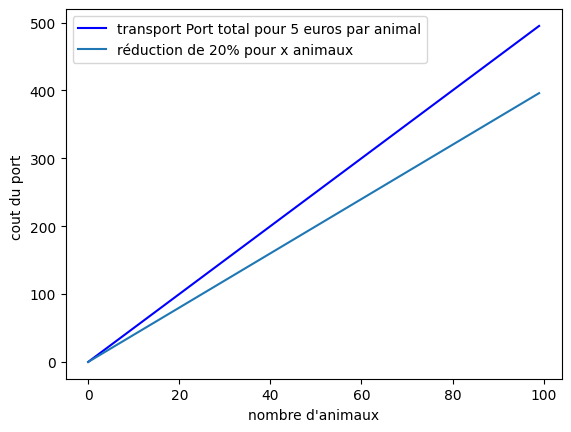

In [55]:
import matplotlib.pyplot as plt
import math

x_cords = range(0,100)

# les frais de transport sont de 5 euros par animal
y_lin = [x * 5 for x in x_cords]

# les frais de transport sont de 5 euros par objet moins une réduction de 20% pour x
y_cords = [ 5 * x -  ( 5 * x * 20 / 100) for x in x_cords] 

plt.plot(x_cords, y_lin, "-b", label="transport Port total pour 5 euros par animal")
plt.plot(x_cords, y_cords, label="réduction de 20% pour x animaux")

plt.xlabel("nombre d'animaux")
plt.ylabel("cout du port ")
plt.legend(loc="upper left")
plt.show()

In [56]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

frais_port = 5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème, 
# On dit que ce sont des variables entières, car on ne peut pas avoir une demi vache.
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)  

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  (100 * charolaise - (frais_port * charolaise - ( frais_port * charolaise * 20 / 100))) 
+ ( 110 * blanc_bleu - ( frais_port * blanc_bleu - ( frais_port * blanc_bleu * 20 / 100)))
+ ( 115 * salers - (frais_port * salers - ( frais_port * salers * 20 / 100))) 

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 0.0
charolaise = 85.0
salers = 0.0
Profit total maximisé =  8160.0


# Ajout de "multiple de "

On revient sur notre problème de base,

On va ajouter une contrainte qui dit que pour tout animal de type Blanc bleu produite, alors il faut produire 2 animaux de type salers.

In [57]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème, 
# On dit que ce sont des variables entières, car on ne peut pas avoir une demi vache.
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)  

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  100 * charolaise + 110 * blanc_bleu + 115 * salers

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Contrainte de multiplicité :
# 1 charolaise produite, on doit avoir 2 salers
Mon_Probleme += charolaise  * 2 == salers

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 72.0
charolaise = 4.0
salers = 8.0
Profit total maximisé =  9240.0


# Ajout de contraintes de coûts additives

- Si la production d'animal de type blanc_bleu > 0, alors le côut de maintenance est de 20
- Si la production d'animal de type > 20, alors le côut de maintenance est de 30 euros supplémentaires 
- Si la production d'animal de type > 50, alors le côut de maintenance est de 30 euros supplémentaires

In [58]:
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# On crée notre modèle
model = Model(name='maximisation_de_profit_agricole', log_output=True)

# On crée nos variables de décision
charolaise = model.integer_var(name='charolaise')
blanc_bleu = model.integer_var(name='blanc_bleu')
salers = model.integer_var(name='salers ')
# Les variables binaires
depassement_0 = model.binary_var(name='depassement_0')
depassement_20 = model.binary_var(name='depassement_20')
depassement_50 = model.binary_var(name='depassement_50')

# On crée la fonction objectif
model.maximize(100 * charolaise + 110 * blanc_bleu + 115 * salers 
               - depassement_0 * 20 - depassement_20 * 30 - depassement_50 * 50) 

# On crée les contraintes
model.add_constraint(7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600)
model.add_constraint(4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700)


# Contraintes de coûts additives
# On crée les contraintes binaires qui vont activer ou pas les couts dans la fonction objectif
model.add_constraint(model.if_then(blanc_bleu >= 0, depassement_0 == 1))
model.add_constraint(model.if_then(blanc_bleu >= 20, depassement_20 == 1))
model.add_constraint(model.if_then(blanc_bleu >= 50, depassement_50 == 1))

model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()

Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 9200
status: OPTIMAL_SOLUTION(2)
  "blanc_bleu"=72
  "salers "=12
  "depassement_0"=1
  "depassement_20"=1
  "depassement_50"=1


# Ajout de contraintes discontinues.

# Description :

- Si la production d'animal de type blanc_bleu > 0, alors le côut de maintenance est de 20
- Si la production d'animal de type blanc_bleu > 20, alors le côut de maintenance est de 30 euros
- Si la production d'animal de type blanc_bleu > 50, alors le côut de maintenance est de 50 euros 

- Note importante :
Les coûts sont toujours pris en compte lors de l'optimisation, lorsque le simplexe est exécuté.
C'est à dire que le solveur prends en compte les coûts fixes cités plus haut et du coup, risque de choisir moins d'animal de type blanc bleus.

# Graphique de nos contraintes discontinues.


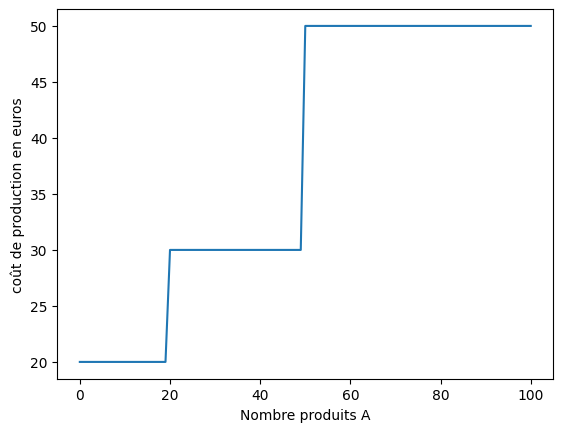

In [59]:
import matplotlib.pyplot as plt
plt.plot([0, 19, 20, 49,50,100], [20,20,30, 30, 50 ,50])
plt.xlabel('Nombre produits A')
plt.ylabel('coût de production en euros')
plt.show()

# Solution avec Python Cplex

In [60]:
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# On crée notre modèle
model = Model(name='maximisation_de_profit_agricole', log_output=True)

# On crée nos variables de décision
charolaise = model.integer_var(name='charolaise')
blanc_bleu = model.integer_var(name='blanc_bleu')
salers = model.integer_var(name='salers ')

# On définit la fonction piecewize de type discontinue
f = model.piecewise(0, [(0, 20), (20, 30), (50, 50)],1)

# On crée la fonction objectif
# On maximise moins les coûts provenant de la fonction piecewize f(x)
model.maximize(100 * charolaise + 110 * blanc_bleu  + 115 * salers - f(blanc_bleu)) 

# On crée les contraintes
model.add_constraint(7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600)
model.add_constraint(4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700)

# Résoudre
model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()

Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 9228.000
status: OPTIMAL_SOLUTION(2)
  "blanc_bleu"=72
  "salers "=12


# Ajout de contraintes piecewize

Les contraintes piecewize permettent de linéariser une fonction côut non linéaire.



# Solution avec Python Cplex

Il existe 2 méthodes, on choisit celle avec les breakpoints. 
(Voir le lien https://ibmdecisionoptimization.github.io/tutorials/html/Beyond_Linear_Programming.html)

Le coût de production est proportionnel au nombre d'animal de type blanc_bleu produit, 
mais il différe par "à coups" selon certains seuils.
On décompose cela en fonctions piecewize, et on se sert de Python Cplex pour résoudre et afficher le graphique des fonctions de coût piecewize.

Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
charolaise  =  0
blanc_bleu  =  72.0
salers   =  12.0
_pwl3  =  52.2
solution for: maximisation_de_profit_agricole
objective: 9247.8
status: OPTIMAL_SOLUTION(2)
blanc_bleu=72
salers =12



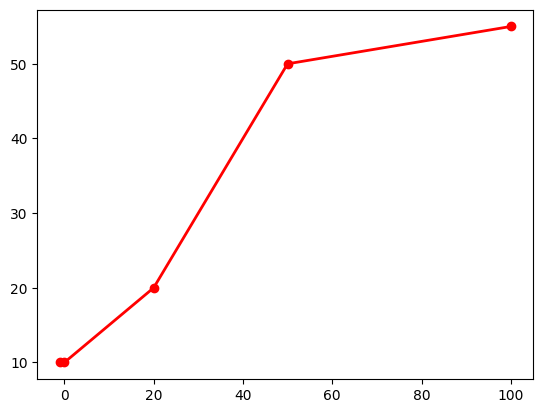

In [61]:
import cplex
import docplex.mp
from docplex.mp.model import Model


# On crée notre modèle
model = Model(name='maximisation_de_profit_agricole', log_output=True)

# On crée nos variables de décision
charolaise = model.integer_var(name='charolaise')
blanc_bleu = model.integer_var(name='blanc_bleu')
salers = model.integer_var(name='salers ')

# On crée les fonctions piecewize avec leur breakpoints
pwf2 = model.piecewise(preslope=0, breaksxy=[(0, 10), (20, 20), (50, 50)], postslope=0.1)


# On crée cette contrainte pour contrôler 
# si les couts piecewize fonctionnent quand on change la valeur
# model.add_constraint(a  <= 1000)

# On crée la fonction objectif
# On maximise notre profit, moins les couts de type piecewize
model.maximize(100 * charolaise + 110 * blanc_bleu  + 115 * salers - pwf2(blanc_bleu)) 

# On crée les contraintes
model.add_constraint(7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600)
model.add_constraint(4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700)

model.parameters.mip.display.set(0)
model.solve()

for v in model.iter_integer_vars():
    print(v," = ",v.solution_value) 

for v in model.iter_continuous_vars():
    print(v," = ",v.solution_value) 

for v in model.iter_binary_vars():
    print(v," = ",v.solution_value) 

print(model.solution)

# On dessine les fonctions de couts piecewize
pwf2.plot(lx=-1, rx=100, k=1, color='r', marker='o', linewidth=2)

#     - Création de fonctions piecewize à partir d'une fonction convexe

On regarde cette librairie, pwlf :
https://jekel.me/piecewise_linear_fit_py/examples.html#fit-with-known-breakpoint-locations

Ceci dépasse le cadre de ce notebook, mais c'est une voie.


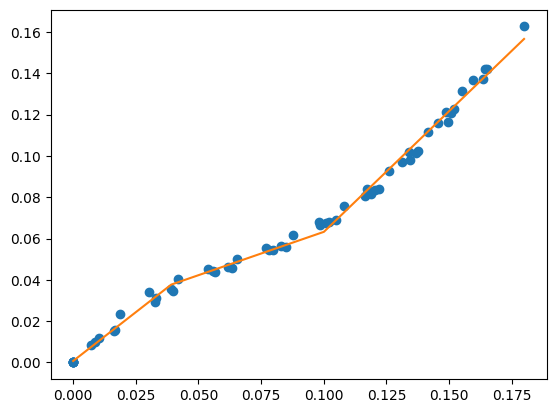

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pwlf

# your data
y = np.array([0.00000000e+00, 9.69801700e-03, 2.94350340e-02,              4.39052750e-02, 5.45343950e-02, 6.74104940e-02,              8.34831790e-02, 1.02580042e-01, 1.22767939e-01,              1.42172312e-01, 0.00000000e+00, 8.58600000e-06,              8.31543400e-03, 2.34184100e-02, 3.39709150e-02,              4.03581990e-02, 4.53545600e-02, 5.02345260e-02,              5.55253360e-02, 6.14750770e-02, 6.82125120e-02,              7.55892510e-02, 8.38356810e-02, 9.26413070e-02,              1.02039790e-01, 1.11688258e-01, 1.21390666e-01,              1.31196948e-01, 0.00000000e+00, 1.56706510e-02,              3.54628780e-02, 4.63739040e-02, 5.61442590e-02,              6.78542550e-02, 8.16388310e-02, 9.77756110e-02,              1.16531753e-01, 1.37038283e-01, 0.00000000e+00,              1.16951050e-02, 3.12089850e-02, 4.41776550e-02,              5.42877590e-02, 6.63321350e-02, 8.07655920e-02,              9.70363280e-02, 1.15706975e-01, 1.36687642e-01,              0.00000000e+00, 1.50144640e-02, 3.44519970e-02,              4.55907760e-02, 5.59556700e-02, 6.88450940e-02,              8.41374060e-02, 1.01254006e-01, 1.20605073e-01,              1.41881288e-01, 1.62618058e-01])
x = np.array([0.00000000e+00, 8.82678000e-03, 3.25615100e-02,              5.66106800e-02, 7.95549800e-02, 1.00936330e-01,              1.20351520e-01, 1.37442010e-01, 1.51858250e-01,              1.64433570e-01, 0.00000000e+00, -2.12600000e-05,              7.03872000e-03, 1.85494500e-02, 3.00926700e-02,              4.17617000e-02, 5.37279600e-02, 6.54941000e-02,              7.68092100e-02, 8.76596300e-02, 9.80525800e-02,              1.07961810e-01, 1.17305210e-01, 1.26063930e-01,              1.34180360e-01, 1.41725010e-01, 1.48629710e-01,              1.55374770e-01, 0.00000000e+00, 1.65610200e-02,              3.91016100e-02, 6.18679400e-02, 8.30997400e-02,              1.02132890e-01, 1.19011260e-01, 1.34620080e-01,              1.49429370e-01, 1.63539960e-01, -0.00000000e+00,              1.01980300e-02, 3.28642800e-02, 5.59461900e-02,              7.81388400e-02, 9.84458400e-02, 1.16270210e-01,              1.31279040e-01, 1.45437090e-01, 1.59627540e-01,              0.00000000e+00, 1.63404300e-02, 4.00086000e-02,              6.34390200e-02, 8.51085900e-02, 1.04787860e-01,              1.22120350e-01, 1.36931660e-01, 1.50958760e-01,              1.65299640e-01, 1.79942720e-01])

# your desired line segment end locations
x0 = np.array([min(x), 0.039, 0.10, max(x)])

# initialize piecewise linear fit with your x and y data
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# fit the data with the specified break points
# (ie the x locations of where the line segments
# will terminate)
my_pwlf.fit_with_breaks(x0)

# predict for the determined points
xHat = np.linspace(min(x), max(x), num=10000)
yHat = my_pwlf.predict(xHat)

# plot the results
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.show()

# 11. Réaliser une simulation de profit avec la loi normale

Parfois, les profits ne sont pas trop surs, pour faire une optimisation plus réaliste, qui reste linéaire, on peut utiliser la loi normale. (Crédit : Aaron Stubberfield)

On prends en compte les Risques:Les estimations des profits peuvent être inexactes.


Lire ce lien de aaron Stubberfield :
https://s3.amazonaws.com/assets.datacamp.com/production/course_8835/slides/chapter4.pdf

On reprends notre programme linéaire de base et on ajoute l'astuce de la loi normale .
Les résultats sont donc différents à chaque fois qu'on recharge le programme, puisque la probabilité est recalculée à chaque fois.


In [63]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 
import random
  
# Probabilités
a, b, c = random.normalvariate(0,25),random.normalvariate(0,25),random.normalvariate(0,25)

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème, 
# On dit que ce sont des variables entières, car on ne peut pas avoir une demi vache.
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)  

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  (100+a) * charolaise + (110+b) * blanc_bleu + (115+c) * salers

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

print("Profits probabilistes:",a,b,c)

blanc_bleu = 0.0
charolaise = 0.0
salers = 75.0
Profit total maximisé =  10644.712057395038
Profits probabilistes: -21.713643280919044 -25.965768041209632 26.929494098600525


- 12. Syntaxe avancée de boucles et listes.

La syntaxe des problèmes linéaire peut être organisée différemment, voici l'exemple de la production agrégée de Aaon Stubberfield .
Ceci peut faciliter les choses dans le cas ou l'on importe ces données à partir d'une base de données, il est plus facile de les placer dans un tableau.


In [64]:
from pulp import *
demand = {'A':[5,0,0],'B':[8,7,6]}
costs = {'A':[20,17,18],'B':[15,16,15]}
# On crée le problème
model = LpProblem("Aggregate_Production_Planning",LpMinimize)
# On définit les variables
time = [0, 1, 2]
prod = ['A','B']
# On crée un dictionnaire de toutes les variables de décision de productions possibles et leur temps
X = LpVariable.dicts("prod", [(p, t) for p in prod for t in time],lowBound=0, cat="Integer")
print(X)
# On crée la fonction objectif : minimiser les coûts
model += lpSum([costs[p][t] * X[(p, t)] for p in prod for t in time])
# On définit la contrainte que la production >= demande
for p in prod:
    for t in time:
        model += X[(p, t)] >= demand[p][t] 
# Résoudre
model.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in model.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Coût total = ", value(model.objective))

{('A', 0): prod_('A',_0), ('A', 1): prod_('A',_1), ('A', 2): prod_('A',_2), ('B', 0): prod_('B',_0), ('B', 1): prod_('B',_1), ('B', 2): prod_('B',_2)}
prod_('A',_0) = 5.0
prod_('A',_1) = 0.0
prod_('A',_2) = 0.0
prod_('B',_0) = 8.0
prod_('B',_1) = 7.0
prod_('B',_2) = 6.0
Coût total =  422.0
